# Color Histogram and features extraction

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
import os
import pandas as pd

## Exploratory analysis

Text(0, 0.5, '# of Pixels')

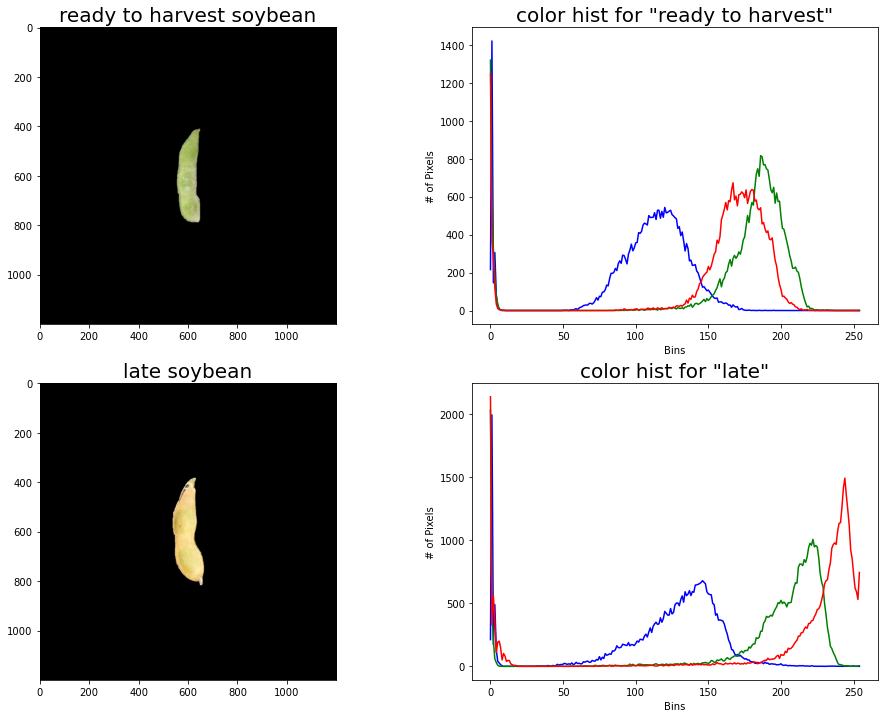

In [2]:
image1 = cv2.imread('../CroppedImageData/Crop_batch1_labeled/croped_IMG_1792_ready_11.jpg')
image2 = cv2.imread('../CroppedImageData/Crop_batch1_labeled/croped_IMG_1797_late_17.jpg')
channels_1 = cv2.split(image1)
channels_2 = cv2.split(image2)
colors = ("b", "g", "r")
plt.figure(figsize = (16,12))
plt.subplot(221)
plt.imshow(cv2.cvtColor(image1.copy(), cv2.COLOR_BGR2RGB))
plt.title('ready to harvest soybean',fontsize = 20)
plt.subplot(222)
for (channel, color) in zip(channels_1, colors):
    # Calculate histogram  (exclue black since too many pixels are black)
    hist = cv2.calcHist([channel], [0], None, [255], [1, 256])
    plt.plot(hist, color = color)
plt.title('color hist for "ready to harvest"',fontsize = 20)
plt.xlabel("Bins")
plt.ylabel("# of Pixels")

plt.subplot(223)
plt.imshow(cv2.cvtColor(image2.copy(), cv2.COLOR_BGR2RGB))
plt.title('late soybean',fontsize = 20)
plt.subplot(224)
for (channel, color) in zip(channels_2, colors):
    # Calculate histogram 
    hist = cv2.calcHist([channel], [0], None, [255], [1, 256])
    plt.plot(hist, color = color)
plt.title('color hist for "late"',fontsize = 20)
plt.xlabel("Bins")
plt.ylabel("# of Pixels")

In [3]:
channels_1

[array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=uint8),
 array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=uint8),
 array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)]

## Extract color hist features

In [4]:
def colorHistFeatures(image):
    features = []      
    ## 1st bin (R=0-32,G=0-32,B=0-32),2nd bin (R=33-64,G=0-32,B=0-32)--> totally 512 bins
    hist = cv2.calcHist([image], [0, 1, 2], None, (8, 8, 8), [1, 256, 1, 256, 1, 256])
    attributeList = []
    attributeNum = 1
    for B in np.arange(hist.shape[0]):
        for G in np.arange(hist.shape[1]):
            for R in np.arange(hist.shape[2]):
                r = 'R=' + str(R*32).zfill(3) + '-' + str((R+1)*32-1).zfill(3)
                g = 'G=' + str(G*32).zfill(3) + '-' + str((G+1)*32-1).zfill(3)
                b = 'B=' + str(B*32).zfill(3) + '-' + str((B+1)*32-1).zfill(3)
                if attributeNum == 148:
                    print('(' + r +  ', ' + g + ', ' + b + '): ', int(hist[B, G, R]))
                attributeList.append((attributeNum,r,g,b))
                attributeNum += 1
#     hist = cv2.calcHist([image],[0,1,2],None,[256,256,256],[0,256,0,256,0,256])
    hist = cv2.normalize(hist, hist).flatten()
    features.extend(hist)
    return features,attributeList

In [5]:
# print(len(colorHistFeatures(image1)))
features1,list1 = colorHistFeatures(image1)
features2,list2 = colorHistFeatures(image2)
features = []
features.append(features1)
features.append(features2)
df = pd.DataFrame(features,columns = list1)
df.head()

(R=096-127, G=064-095, B=064-095):  0
(R=096-127, G=064-095, B=064-095):  44


(1, R=000-031, G=000-031, B=000-031)  (2, R=032-063, G=000-031, B=000-031)  \
0                              0.051913                                   0.0   
1                              0.031712                                   0.0   

   (3, R=064-095, G=000-031, B=000-031)  (4, R=096-127, G=000-031, B=000-031)  \
0                                   0.0                                   0.0   
1                                   0.0                                   0.0   

   (5, R=128-159, G=000-031, B=000-031)  (6, R=160-191, G=000-031, B=000-031)  \
0                                   0.0                                   0.0   
1                                   0.0                                   0.0   

   (7, R=192-223, G=000-031, B=000-031)  (8, R=224-255, G=000-031, B=000-031)  \
0                                   0.0                                   0.0   
1                                   0.0                                   0.0   

   (9, R=000-031, G=032-063, B=000-031)  \
0                                   0.0   
1                                   0.0   

   (10, R=032-063, G=032-063, B=000-031)  ...  \
0                               0.000000  ...   
1                               0.000205  ...   

   (503, R=192-223, G=192-223, B=224-255)  \
0                                     0.0   
1                                     0.0   

   (504, R=224-255, G=192-223, B=224-255)  \
0                                     0.0   
1                                     0.0   

   (505, R=000-031, G=224-255, B=224-255)  \
0                                     0.0   
1                                     0.0   

   (506, R=032-063, G=224-255, B=224-255)  \
0                                     0.0   
1                                     0.0   

   (507, R=064-095, G=224-255, B=224-255)  \
0                                     0.0   
1                                     0.0   

   (508, R=096-127, G=224-255, B=224-255)  \
0                                     0.0   
1                                     0.0   

   (509, R=128-159, G=224-255, B=224-255)  \
0                                     0.0   
1                                     0.0   

   (510, R=160-191, G=224-255, B=224-255)  \
0                                     0.0   
1                                     0.0   

   (511, R=192-223, G=224-255, B=224-255)  \
0                                     0.0   
1                                     0.0   

   (512, R=224-255, G=224-255, B=224-255)  
0                                0.000000  
1                                0.001504  

[2 rows x 512 columns]

## Batch processing

In [6]:
def batchExtractColorFeatures(inputDir,outputDir):
    imread_failed = []
    features = []
    index = []
    df = pd.DataFrame(columns = range(1,513))
    if os.path.isdir(outputDir):
        pass
    else:
        os.mkdir(outputDir)
    for (path,dirname,filenames) in os.walk(inputDir):
        for image in filenames:
            try:
                src = path + image
                imgName = image.split('.')[0]
                img = cv2.imread(src)
                feature,attributes = colorHistFeatures(img) 
                features.append(feature)
                index.append(imgName)
                df = pd.DataFrame(features,columns = attributes,index = index)
                df.index.name = 'Image'
                df.to_csv(outputDir+'ColorHistFeatures_batch5.csv')
            except:
                imread_failed.append(image)
    display(df)

In [7]:
batchExtractColorFeatures('../testTrainingData_batch5/','../csvFiles/')

(R=096-127, G=064-095, B=064-095):  2014
(R=096-127, G=064-095, B=064-095):  12697
(R=096-127, G=064-095, B=064-095):  6685
(R=096-127, G=064-095, B=064-095):  4653
(R=096-127, G=064-095, B=064-095):  64
(R=096-127, G=064-095, B=064-095):  38
(R=096-127, G=064-095, B=064-095):  35
(R=096-127, G=064-095, B=064-095):  0
(R=096-127, G=064-095, B=064-095):  96
(R=096-127, G=064-095, B=064-095):  5548
(R=096-127, G=064-095, B=064-095):  4707
(R=096-127, G=064-095, B=064-095):  11595
(R=096-127, G=064-095, B=064-095):  3723
(R=096-127, G=064-095, B=064-095):  2142
(R=096-127, G=064-095, B=064-095):  3357
(R=096-127, G=064-095, B=064-095):  235
(R=096-127, G=064-095, B=064-095):  45566
(R=096-127, G=064-095, B=064-095):  1
(R=096-127, G=064-095, B=064-095):  91
(R=096-127, G=064-095, B=064-095):  956
(R=096-127, G=064-095, B=064-095):  1193
(R=096-127, G=064-095, B=064-095):  10273
(R=096-127, G=064-095, B=064-095):  7855
(R=096-127, G=064-095, B=064-095):  10832
(R=096-127, G=064-095, B=064-

(1, R=000-031, G=000-031, B=000-031)  \
Image                                                 
2098late4                                  0.057348   
2076late6                                  0.071019   
2144disease7                               0.023079   
2076late5                                  0.087768   
2044ready5                                 0.032995   
2039ready13                                0.083340   
2039ready12                                0.048718   
2038ready3                                 0.137117   
2063ready6                                 0.044812   
2144disease1                               0.041619   
2144disease3                               0.051229   
2096late9                                  0.026450   
2093late11                                 0.034390   
2144disease2                               0.035194   
2084late5                                  0.058096   
2147disease11                              0.047006   
2147disease2                               0.029467   
2051ready7                                 0.024472   
2029ready20                                0.078271   
2147disease10                              0.031881   
2147disease12                              0.046315   
2089late6                                  0.055496   
2075late8                                  0.066630   
2145disease9                               0.044065   
2147disease13                              0.047904   
2077late15                                 0.033362   
2147disease4                               0.030536   
2086late13                                 0.079609   
2095late7                                  0.032604   
2034ready5                                 0.049400   
2086late12                                 0.052376   
2147disease5                               0.017164   
2091late18                                 0.050757   
2147disease14                              0.048951   
2147disease7                               0.030057   
2147disease6                               0.043866   
2147disease15                              0.056786   
2059ready18                                0.081385   
2090late2                                  0.046635   
2043ready9                                 0.045177   
2038ready15                                0.076652   
2028ready4                                 0.055733   
2036ready18                                0.075780   
2100late6                                  0.033442   
2031ready1                                 0.039346   
2083late16                                 0.059584   
2098late18                                 0.070738   
2148disease13                              0.037282   
2148disease12                              0.055700   
2049ready16                                0.034878   
2148disease11                              0.047448   
2024ready2                                 0.049908   
2071ready8                                 0.039809   
2073late3                                  0.048232   
2058ready4                                 0.055288   
2100late17                                 0.034540   
2033ready9                                 0.052357   
2100late15                                 0.024533   
2066ready3                                 0.039732   
2148disease17                              0.027756   

               (2, R=032-063, G=000-031, B=000-031)  \
Image                                                 
2098late4                                  0.014779   
2076late6                                  0.001769   
2144disease7                               0.000541   
2076late5                                  0.003654   
2044ready5                                 0.000106   
2039ready13                                0.000250   
2039ready12                                0.000042   
2038ready3                                 0.000408   
2063ready6                                 0.000232   